In [1]:
import joblib 
from IPython.display import HTML
css_str = '<style> \
.jp-icon-warn0 path {fill: var(--jp-warn-color0);} \
.bp3-button-text path { fill: var(--jp-inverse-layout-color3);} \
.jp-icon-brand0 path { fill: var(--jp-brand-color0);} \
text.terms { fill: #616161;} \
</style>'
display(HTML(css_str))
#import importlib.util
#importlib.reload(rulesets)
#importlib.reload(nlp_explain_spa)

# Generación de explicaciones

La idea se basa en buscar criterios comunes de un conjunto de tripletas. En este punto tendríamos:

    1. UN vocabulario: elegido por el usuar:io ingeniero y el especialista de dominio, u obtenido a partir de 
       topic modeling
    2. Una importancia de variables que da un vocabulario
    3. Un conjunto de tripletas. Estas tripletas, recordemos, han sido generadas a partir del vocabulario inicial
    4. Entidades obtenidas de spacy y de 
    5. Entidades identificadas dbpedia

3. Lo que voy a hacer es coger esas tripletas y explicarlas. Para eso me centraré en las entidades de dbpedia y en las obtenidas con spacy. Realmente lo que hay que explicar son nombres propios o adjetivos, no voy a tocar nada de verbos.
3.1 El algoritmo recibirá como entradas:
3.1.1  el número de tripletas diferentes, entendiendo como tripleta diferente, aquellas en las que el sujeto sea diferente (todas sus entidades sean diferentes)
3.1.2  el número de tripletas en las que se puede repetir un sujeto o un predicado
3.2 Lo que pretendo es que el algoritmo genere:
3.2.1  Una descripción de los tipos de ese vocabulario de entrada (bien dbpedia, bien spacy vía wordnet)


    

In [22]:
from owlready2 import *
import json 
from spotlight import *
import nltk
from nltk.corpus import wordnet as wn
import pandas as pd



In [23]:
from owlready2 import *
import pandas as pd

In [24]:
import joblib
corpus =  joblib.load('../bbc_objects/bbc_processed_final_semantic_2')

In [25]:
corpus.head()

,category,text,coref_text,cleaned,entidades,new_target,entidades_dbpedia,entidades_dbpedia_simplificadas
0,tech,tv future in the hands of viewers with home th...,tv future in the hands of viewers with home th...,tv future hand viewer home theatre system plas...,"{the BBC Broadcast's, five years' time, today,...",3,[{'URI': 'http://dbpedia.org/resource/Televisi...,{'TV': [{'URI': 'http://dbpedia.org/resource/T...
1,business,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldc...,worldcom boss leave book worldcom boss bernie ...,"{Mr Sullivan, Mr Ebbers, Bernie Ebbers, Worldc...",1,[{'URI': 'http://dbpedia.org/resource/MCI_Inc....,{'Worldcom': [{'URI': 'http://dbpedia.org/reso...
2,sport,tigers wary of farrell gamble leicester say ...,tigers wary of farrell gamble leicester say ...,tiger wary farrell gamble leicester tiger wary...,"{Tigers, another three months, Great Britain, ...",5,[{'URI': 'http://dbpedia.org/resource/Colin_Fa...,{'Farrell': [{'URI': 'http://dbpedia.org/resou...
3,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle in fa cup premiership s...,yeade face newcastle fa cup premiership newcas...,"{Martin Allen's, Newcastle United, Southampton...",2,[{'URI': 'http://dbpedia.org/resource/Yeading_...,{'Yeading': [{'URI': 'http://dbpedia.org/resou...
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean s twelve raids box office ocean s twelve...,ocean s raid box office ocean s crime caper se...,"{$110m, the 1960s, $16.1m, Christmas, Warner B...",0,[{'URI': 'http://dbpedia.org/resource/Crime_fi...,{'crime': [{'URI': 'http://dbpedia.org/resourc...


In [26]:
tripletas = pd.read_csv('../bbc_objects/dataset_final_triplet_bbc_new.csv',sep=',')

In [27]:
tripletas

,Unnamed: 0,subject,relation,object,new_topic
0,0,tv future,will,in hands of viewers with home theatre systems ...,3
1,1,tv future,will,in hands will radically different in five year...,3
2,2,way people,watch,tv,3
3,3,tv future,will,in hands of viewers will different in five yea...,3
4,4,tv future,will,in hands of viewers with home theatre systems ...,3
...,...,...,...,...,...
159557,159557,boss graeme souness,paid,tribute,2
159558,159558,boss graeme souness,paid,tribute,2
159559,159559,tribute,laurent,united,2
159560,159560,please,said,graeme,2


In [28]:
topics = joblib.load('../bbc_objects/new_bbc_topics_7_sinprob')

In [29]:


topics.get(3)

['people',
 'mobile',
 'phone',
 'technology',
 'network',
 'new',
 'service',
 'use',
 'user',
 'search',
 'camera',
 'information',
 'datum',
 'net',
 'firm',
 'software',
 'consumer',
 'way',
 'mr',
 'high',
 'mail',
 'website',
 'digital',
 'site',
 'music',
 'tv',
 'work',
 'file',
 'virus',
 'company',
 'video',
 'internet',
 'microsoft',
 'download',
 'attack',
 'google',
 'base',
 'help',
 'time',
 'online',
 'number',
 'offer',
 'image',
 'device',
 'industry',
 'research',
 'linux',
 'security',
 'customer',
 'apple',
 'machine',
 'news',
 'look',
 'send',
 'web',
 'blog',
 'domain',
 'program',
 'e',
 'year',
 'market',
 'million',
 'launch',
 'month',
 'operator',
 'sony',
 'uk',
 'electronic',
 'let',
 'definition',
 'maker',
 'speed',
 'version',
 'handset',
 'different',
 'grow',
 'content',
 'gadget',
 'try',
 'picture',
 'access',
 'want',
 'report',
 'message',
 'europe',
 'medium',
 'engine',
 'screen',
 'dvd',
 'project',
 'create',
 'control',
 'mean',
 'ibm',
 'pl

In [ ]:
topics

In [31]:

topics_entsdbpedia = joblib.load('../bbc_objects/diccionario_topic_entidades_dbpedia')

In [32]:
#corpus.head(2)

In [33]:
import joblib
target = 3

In [34]:
super_dict = corpus.loc[corpus.new_target==target,'entidades']
#print(dicts)
#super_dict = {}
#for d in dicts:
#    print(d)
#    dic = eval(d)
#    for k, v in dic.items():  # d.items() in Python 3+
#        super_dict.setdefault(k, set()).add(v)
        


In [35]:
target = 3
anterior = set()
tripletas.head()

,Unnamed: 0,subject,relation,object,new_topic
0,0,tv future,will,in hands of viewers with home theatre systems ...,3
1,1,tv future,will,in hands will radically different in five year...,3
2,2,way people,watch,tv,3
3,3,tv future,will,in hands of viewers will different in five yea...,3
4,4,tv future,will,in hands of viewers with home theatre systems ...,3


In [36]:
tripletas = tripletas.loc[tripletas.new_topic==target,['subject','relation','object']]

In [37]:
visitar_objeto = True
diccionario_dbpedia = topics_entsdbpedia.get(target)

In [41]:

#ll = joblib.load('../amazon_objects/corpus_amazon_final_semantic2')
#ll.iloc[1,8]

## utiles (meter en semantic_oboe)

In [42]:
from semantic_oboe.utils.types import CaseInsensitiveDict
from semantic_oboe.triplet_manager_lib import Tripleta

In [43]:
dictdbp = CaseInsensitiveDict()
dictdbp.update(diccionario_dbpedia)

In [44]:
type(dictdbp)

semantic_oboe.utils.types.CaseInsensitiveDict

In [45]:
dictner  = CaseInsensitiveDict()
dictner.update(super_dict)

In [46]:
target

3

In [47]:
tripletas

,subject,relation,object
0,tv future,will,in hands of viewers with home theatre systems ...
1,tv future,will,in hands will radically different in five year...
2,way people,watch,tv
3,tv future,will,in hands of viewers will different in five yea...
4,tv future,will,in hands of viewers with home theatre systems ...
...,...,...,...
158978,he said,was,sometimes easy
158979,though he said,was,easy
158980,he said,was,easy
158981,he,said,next


In [48]:
cont = 0
n_tripletas_diferentes=15
anterior = Tripleta(None)

In [315]:
topic = 3
#terminos_a_incluir = set(topics.get(3)[-40:])
terminos_a_incluir = set(['dvd','google','electronic','tv','sony','screen','nintendo','player','mobile','phone','software','video','network','apple','program','linux'])

In [316]:
import pandas as pd

In [317]:
import random
#tr = random.sample(tripletas, n_tripletas_diferentes)
tr = tripletas.iloc[2000:3000,:]
tr
tripletas_diferentes = 10
visitar_objeto = True

In [318]:
from semantic_oboe.triplet_manager_lib import Tripleta
elemento = tripletas.iloc[0,:]
tripleta = Tripleta({'subject': str(elemento[0]), 'relation': elemento[1], 'object': str(elemento[2])})

tripleta.dondeSonDiferentes(anterior)

('sujeto', 'relacion', 'objeto')

In [319]:
tripleta.esTripletaSuper(anterior)==anterior.esTripletaSuper(tripleta)

True

In [320]:
terminos_a_incluir

{'apple',
 'dvd',
 'electronic',
 'google',
 'linux',
 'mobile',
 'network',
 'nintendo',
 'phone',
 'player',
 'program',
 'screen',
 'software',
 'sony',
 'tv',
 'video'}

In [321]:
listado_tripletas = []
for i,elemento in tr.iterrows():
   
    tripleta = Tripleta({'subject': str(elemento[0]), 'relation': elemento[1], 'object': str(elemento[2])})
    sujeto = set(tripleta.sujeto.split(' '))
    objeto = set(tripleta.objeto.split(' ')) if visitar_objeto else None
    
    if ( (tripleta.esTripletaSuper(anterior)==anterior.esTripletaSuper(tripleta))  and (tripleta.dondeSonDiferentes(anterior) == ('sujeto', 'relacion', 'objeto')) or (tripleta.dondeSonDiferentes(anterior)  == ('sujeto', None, 'objeto'))):
        anterior = tripleta
    else:
        continue
        
  
    #print (sujeto)
    #print(objeto)
   # break
    if terminos_a_incluir is None or terminos_a_incluir.isdisjoint(sujeto)==False or (visitar_objeto and terminos_a_incluir.isdisjoint(objeto)==False):

        termino=''
        resource=''
        dbpedia=[]
        ner=[]
        lwordnet=[]
        diccionario_tripleta = {}
        listado_terminos = list()

        visitados = set()

        palabrasdbpedia = set([string.lower() for string in list(dictdbp.keys())])
        encontradas = sujeto.intersection(palabrasdbpedia)
        no_encontradas = sujeto.difference(palabrasdbpedia)
        
        if visitar_objeto:
            encontradas.update(objeto.intersection(palabrasdbpedia))
            no_encontradas.update(objeto.difference(palabrasdbpedia))
        
        final = encontradas.union(no_encontradas)
        
        for termino in encontradas:
            if termino in visitados:
                continue
            diccionario_termino={}
            if termino[0].isdigit():
                no_encontradas.add(termino)
                continue
           
            if termino in visitados: 
                continue

            info_termino = dictdbp.get(termino)[0] #informacion del tipo de dbpedia: palabra, resource y tipos
            uri_db = info_termino.get('URI')
            resource = uri_db
            dbpedia = info_termino.get('tipos') 
            
            visitados.add(termino)
            
            sinonimos = ''
            
            for i in range(len(wn.synsets(termino))):
                syn = wn.synsets(termino)[i] #cojo el primer término
                sinonimos = syn.lemma_names()
                if len(syn.hypernyms())>0:
                    for tipos in syn.hypernyms():
                        lwordnet.extend(tipos.lemma_names())
                    
                    #listado_wn.append({'tipo_de_entidad_en_diccionario':syn.lemma_names(),'tipos_diccionario':syn.hypernyms()})
          
            sujeto_en_ner = dictner.get(termino)
            
            
            if sujeto_en_ner != '' and sujeto_en_ner is not None:
                ner.append(sujeto_en_ner)
        
            diccionario_termino={'termino':termino,'sinonimos':sinonimos, 'resource':resource,'dbpedia':dbpedia,'ner':ner,'wordnet':lwordnet}
            listado_tripletas.append(diccionario_termino)

    #print ("\nSynset specific term :  ",  
    #       syn.hypernyms()[0].hyponyms()) 
            

In [322]:
dataframe = pd.DataFrame(data = listado_tripletas)

In [323]:
#dataframe.drop_duplicates(keep='last')
dataframe = dataframe.drop_duplicates(subset = ["termino"])

In [324]:
#rsplit('/', 1)[-1]

In [325]:
import spacy

nlp = spacy.load('en_core_web_lg')

In [326]:
sinonimos

['digital']

In [327]:
termino

'digital'

In [328]:
## Tipos

In [329]:
def remove_numbers (s):
    return  "".join([i for i in s.replace('_',' ').replace('-',' ') if not i.isdigit()])

import wordsegment
from wordsegment import load, segment
load()
    
def split_word(s):
    lista = segment(s)
    if len(lista)>1:
        return " ".join(lista)
    elif len(lista)>0:
        return lista[0]
    else:
        return ''

def remove_dbpedia_categories(s):
    return s.replace('Wikidata:','').replace('Wikicat','').replace('DBpedia:','').replace('Category:','').replace('Schema:','').replace('DUL:','')

def return_url_element(s):
    return s.rsplit('/', 1)[-1]

In [330]:
## Analisis horizontal: termino vs tipos 


In [331]:
tipos

Synset('sculpture.n.01')

In [332]:
termino

'digital'

In [333]:
dataframe

,termino,sinonimos,resource,dbpedia,ner,wordnet
0,gadget,"[appliance, contraption, contrivance, convenie...",http://dbpedia.org/resource/Gadget,"[http://dbpedia.org/ontology/Software, http://...",[],[device]
1,nintendo,,http://dbpedia.org/resource/Xbox,"[http://dbpedia.org/ontology/Company, http://d...",[],[device]
4,british,[British],http://dbpedia.org/resource/United_Kingdom,"Wikidata:Q6256,Schema:Place,Schema:Country,DBp...",[],"[device, nation, land, country]"
17,bluetooth,,http://dbpedia.org/resource/Bluetooth,"[http://www.w3.org/2002/07/owl#Thing, http://d...",[],[]
18,gprs,,http://dbpedia.org/resource/General_Packet_Rad...,"[http://www.w3.org/2002/07/owl#Thing, http://d...",[],[]
19,wireless,[wireless],http://dbpedia.org/resource/Wireless,"[http://www.w3.org/2002/07/owl#Thing, http://d...",[],"[broadcasting, telecommunication, telecom, rec..."
35,nokia,,http://dbpedia.org/resource/Nokia_Networks,"Wikidata:Q4830453,Wikidata:Q43229,Wikidata:Q24...",[],[]
60,sony,,http://dbpedia.org/resource/Sony,"Wikidata:Q4830453,Wikidata:Q43229,Wikidata:Q24...",[],[]
62,gizmondo,,http://dbpedia.org/resource/Gizmondo,"Wikidata:Q1067263,DBpedia:Device,DBpedia:Infor...",[],[]
65,tv,"[television_receiver, television, television_s...",http://dbpedia.org/resource/Television,"[http://www.w3.org/2002/07/owl#Thing, http://d...",[],"[broadcasting, receiver, receiving_system, com..."


In [334]:
n_sinonimos = 1 # sustituir por más similares de acuerdo a spacy?
tipos=[]
## no lo esta haciendo bien?

lista_tipos_termino = []
vocabulario_terminos = []
##aqui seleccionar n mayores y hacer una estructura
import numpy as np
from operator import itemgetter
visitado = []
for i, row in dataframe.iterrows():
    tipos = []
    termino = row.termino
    print ('analizando '+row.termino)
    if row.termino in visitado:
        continue
    if type(row.dbpedia)==str:
        tipos.extend(row.dbpedia.split(','))
        
    else:
        tipos.extend(row.dbpedia)
    tipos.extend(row.wordnet)
    
    #print('tipos dbpedia')
    #print(row.dbpedia)
    ##print('wordnet')
    #print(row.wordnet)
    print('tipos')
    print(tipos)
    
    tipos_termino = [return_url_element(remove_dbpedia_categories(remove_numbers(tipo))) for tipo in tipos]
    tipos_termino = [tipo for tipo in tipos_termino if tipo !='Q']
    #tipos_termino = [split_word(tipo) for tipo in tipos_termino if tipo!='' and tipo!=[]]
    res = [nlp(termino).similarity(nlp(tipo)) for tipo in tipos_termino]
    print ('tipos termino')
    print(tipos_termino)
    tipos_mas_similares = itemgetter (*list(np.argpartition(res, -n_sinonimos)[-n_sinonimos:]))(tipos_termino)
    print('tipos mas simialres')
    print(tipos_mas_similares)
    indices_tipos_similares = list(np.argpartition(res, -n_sinonimos)[-n_sinonimos:])
    puntuaciones_tipos_similares=itemgetter(*indices_tipos_similares)(res)
    lista_tipos_termino.append({'termino':row.termino,'tipos':tipos_mas_similares,'similitudes':puntuaciones_tipos_similares})
    vocabulario_terminos.append(termino)
    if type(tipos_mas_similares)==str:
            vocabulario_terminos.append(tipos_mas_similares)
    else:
        vocabulario_terminos.extend(tipos_mas_similares)
    visitado.append(row.termino)

analizando gadget
tipos
['http://dbpedia.org/ontology/Software', 'http://dbpedia.org/ontology/MusicGenre', "'", 'device']
tipos termino
['Software', 'MusicGenre', "'", 'device']
tipos mas simialres
device
analizando nintendo
tipos
['http://dbpedia.org/ontology/Company', 'http://dbpedia.org/class/yago/WikicatVideoGameConsoles', 'http://dbpedia.org/class/yago/WikicatMicrosoftVideoGameConsoles', 'http://dbpedia.org/class/yago/WikicatSixth-generationVideoGameConsoles', 'http://dbpedia.org/class/yago/Artifact100021939', 'http://dbpedia.org/class/yago/ConsoleTable103092883', 'http://dbpedia.org/class/yago/Furnishing103405265', 'http://dbpedia.org/class/yago/Furniture103405725', 'http://dbpedia.org/class/yago/Instrumentality103575240', 'http://dbpedia.org/class/yago/Object100002684', 'http://dbpedia.org/class/yago/PhysicalEntity100001930', 'http://dbpedia.org/class/yago/Plaything103964744', 'http://dbpedia.org/class/yago/Table104379243', 'http://dbpedia.org/class/yago/Whole100003553', 'http:/

In [335]:
lista_tipos_termino

[{'termino': 'gadget', 'tipos': 'device', 'similitudes': 0.5144542848494642},
 {'termino': 'nintendo',
  'tipos': 'Furniture',
  'similitudes': 0.1941014427754282},
 {'termino': 'british',
  'tipos': 'country',
  'similitudes': 0.35507087103046464},
 {'termino': 'bluetooth',
  'tipos': 'Communication',
  'similitudes': 0.3354269213117044},
 {'termino': 'gprs', 'tipos': 'Protocol', 'similitudes': 0.2754991219721348},
 {'termino': 'wireless',
  'tipos': 'communication system',
  'similitudes': 0.557452228420734},
 {'termino': 'nokia', 'tipos': 'Company', 'similitudes': 0.13409830903081718},
 {'termino': 'sony', 'tipos': 'Company', 'similitudes': 0.19643654132174354},
 {'termino': 'gizmondo', 'tipos': 'InformationAppliance', 'similitudes': 0.0},
 {'termino': 'tv', 'tipos': 'broadcasting', 'similitudes': 0.509985086572599},
 {'termino': 'internet',
  'tipos': 'computer network',
  'similitudes': 0.67571934999819},
 {'termino': 'software',
  'tipos': 'Software',
  'similitudes': 1.000000010

In [336]:

vocabulario_terminos

['gadget',
 'device',
 'nintendo',
 'Furniture',
 'british',
 'country',
 'bluetooth',
 'Communication',
 'gprs',
 'Protocol',
 'wireless',
 'communication system',
 'nokia',
 'Company',
 'sony',
 'Company',
 'gizmondo',
 'InformationAppliance',
 'tv',
 'broadcasting',
 'internet',
 'computer network',
 'software',
 'Software',
 'microsoft',
 'computer code',
 'telcos',
 'public service corporation',
 'cable',
 'wire',
 'sbc',
 'public service corporation',
 'telco',
 'broadcasting',
 'apple',
 'apple tree',
 'piracy',
 'copyright infringement',
 'ibm',
 'Company',
 'goods',
 'quality',
 'mobiles',
 'broadcasting',
 'digital',
 'broadcasting']

In [337]:
import nltk
import nltk
lemma = nltk.wordnet.WordNetLemmatizer()
lemma.lemmatize('telcos')


'telco'

In [338]:
type(vocabulario_terminos)

list

In [339]:
vocabulario_terminos = set([lemma.lemmatize(e).lower() for e in vocabulario_terminos])

In [340]:
vocabulario_terminos = set(vocabulario_terminos)

In [341]:
vocabulario_terminos =         set(vocabulario_terminos)
matrix = [[ nlp(t).similarity(nlp(t2)) for  t2 in vocabulario_terminos] for  t in vocabulario_terminos]

In [342]:
df = pd.DataFrame(data = matrix, columns = vocabulario_terminos)

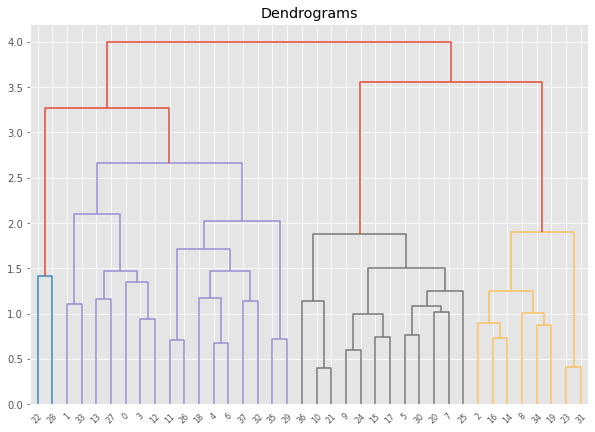

In [343]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d
plt.figure(figsize=(10,7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df, method='ward',optimal_ordering=True))

In [344]:
#dend['leaves']

In [345]:
#dend

In [346]:
#[list(vocabulario_terminos)[i] for i in [0, 6, 4, 13, 5, 9]]


In [347]:
#[list(vocabulario_terminos)[i] for i in [10,11,12]]



In [348]:
#[list(vocabulario_terminos)[i] for i in [3, 15, 17, 2, 7, 8, 14, 1, 16]]


In [349]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')


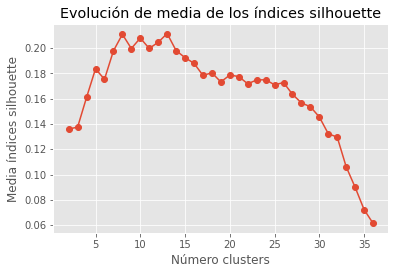

In [350]:
range_n_clusters = range(2, len(list(vocabulario_terminos))-1)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )

    cluster_labels = modelo.fit_predict(df)
    silhouette_avg = silhouette_score(df, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
    
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

In [355]:
# devolviendo el número de temas
len(list(vocabulario_terminos))

38

In [356]:
valores_medios_silhouette
max_value = max(valores_medios_silhouette[2:50])

In [357]:
max_value

0.21158739657653594

In [358]:
max_index = valores_medios_silhouette.index(max_value)
temas = max_index + 2

In [359]:
temas

13

In [369]:
modelo_hclust_ward = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'ward',
                            n_clusters = temas
                     )
res = modelo_hclust_ward.fit_predict(X=df)

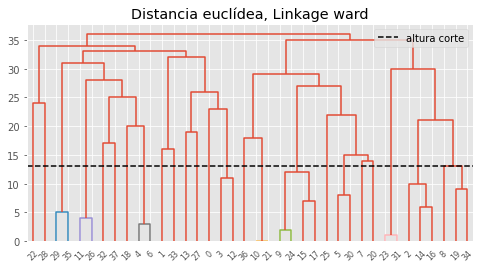

In [370]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    distance = np.arange(model.children_.shape[0])

    linkage_matrix = np.column_stack(
        [model.children_, distance, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
    
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
#altura_corte = 6
plot_dendrogram(modelo_hclust_ward, color_threshold = 6, ax=ax)#color_threshold=altura_corte
ax.set_title("Distancia euclídea, Linkage ward")
ax.axhline(y=temas, c = 'black', linestyle='--', label='altura corte')
ax.legend();

In [371]:
modelo_hclust_ward.feature_names_in_

array(['tv', 'sbc', 'bluetooth', 'cable', 'good', 'mobile', 'quality',
       'digital', 'nintendo', 'software', 'communication',
       'public service corporation', 'wire', 'telco', 'sony',
       'computer network', 'nokia', 'internet', 'country', 'ibm',
       'device', 'communication system', 'gizmondo', 'apple',
       'computer code', 'gadget', 'company', 'broadcasting',
       'informationappliance', 'copyright infringement', 'wireless',
       'apple tree', 'british', 'gprs', 'microsoft', 'piracy', 'protocol',
       'furniture'], dtype=object)

In [372]:
modelo_hclust_ward.labels_

array([ 1, 11,  2,  1,  3,  4,  3,  4,  2, 10,  8,  9,  1,  5,  2, 10,  2,
       10,  3,  2,  4,  8,  0,  7, 10,  4,  9,  5,  0,  6,  4,  7, 12, 11,
        2,  6,  8, 12])

In [373]:
modelo_hclust_ward.n_connected_components_

1

## Propuesta de algoritmno

In [374]:
frase = """Para analizar el texto del topic {0}, se han identificado como relevantes los siguientes términos: {1}. \n De estos términos, hemos identificado categorías y sinónimos. Para entender cómo están relacionados, hemos agrupado estos términos en temas similares. Hemos encontrado {2} temas compuestos por estos términos: """.format(topic, ','.join(terminos_a_incluir),temas)

In [375]:
frase

'Para analizar el texto del topic 3, se han identificado como relevantes los siguientes términos: video,tv,screen,player,linux,network,nintendo,apple,software,phone,electronic,google,dvd,sony,mobile,program. \n De estos términos, hemos identificado categorías y sinónimos. Para entender cómo están relacionados, hemos agrupado estos términos en temas similares. Hemos encontrado 13 temas compuestos por estos términos: '

In [376]:
for i in range (temas):
    print ('Tema número {}:'.format(i))
    indices = np.where(res == i)
    indices = indices[0]
    conceptos = [list(vocabulario_terminos)[i] for i in indices]
    print(conceptos)
    


Tema número 0:
['gizmondo', 'informationappliance']
Tema número 1:
['tv', 'cable', 'wire']
Tema número 2:
['bluetooth', 'nintendo', 'sony', 'nokia', 'ibm', 'microsoft']
Tema número 3:
['good', 'quality', 'country']
Tema número 4:
['mobile', 'digital', 'device', 'gadget', 'wireless']
Tema número 5:
['telco', 'broadcasting']
Tema número 6:
['copyright infringement', 'piracy']
Tema número 7:
['apple', 'apple tree']
Tema número 8:
['communication', 'communication system', 'protocol']
Tema número 9:
['public service corporation', 'company']
Tema número 10:
['software', 'computer network', 'internet', 'computer code']
Tema número 11:
['sbc', 'gprs']
Tema número 12:
['british', 'furniture']


In [119]:
from nltk.corpus import wordnet


syns = wordnet.synsets("cat")
print(syns[0].definition())

(array([ 3, 15]),)

______________

In [ ]:
## otras aprox
## similitud vertical: agregar y buscar tipos comunes entre los más representativos?
## aquí ver si consigo ver con mi clase emn dbpedia si dos palabras están relacionadsa con sparql